# **Exploratory Data Analysis (EDA)**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [183]:
# Load the dataset
df = pd.read_csv("../data/gold_data.csv") 
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,1117.699951171875,1117.699951171875,1122.300048828125,1097.0999755859375,1117.699951171875,184
3,2010-01-05,1118.0999755859375,1118.0999755859375,1126.5,1115.0,1118.0999755859375,53
4,2010-01-06,1135.9000244140625,1135.9000244140625,1139.199951171875,1120.699951171875,1135.9000244140625,363


In [184]:
# Rename the columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Convert 'Date' to datetime format explicitly
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Convert numeric columns to numeric type
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Drop rows where 'Date' is invalid or NaN
df = df.dropna(subset=['Date'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2010-01-04,1117.699951,1117.699951,1122.300049,1097.099976,1117.699951,184.0
3,2010-01-05,1118.099976,1118.099976,1126.500000,1115.000000,1118.099976,53.0
4,2010-01-06,1135.900024,1135.900024,1139.199951,1120.699951,1135.900024,363.0
5,2010-01-07,1133.099976,1133.099976,1133.099976,1129.199951,1133.099976,56.0
6,2010-01-08,1138.199951,1138.199951,1138.199951,1122.699951,1138.199951,54.0


## Display Dataset Information


In [185]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 2 to 3761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3760 non-null   datetime64[ns]
 1   Open       3760 non-null   float64       
 2   High       3760 non-null   float64       
 3   Low        3760 non-null   float64       
 4   Close      3760 non-null   float64       
 5   Adj Close  3760 non-null   float64       
 6   Volume     3760 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 235.0 KB
None


## **Dataset Description**

The dataset contains **financial market data** with the following columns:

### **1. Date**  
- Represents the date of the transaction.  

### **2. Open**  
- The opening price of the asset on that particular day.  

### **3. High**  
- The highest price reached during the day.  

### **4. Low**  
- The lowest price reached during the day.  

### **5. Close**  
- The closing price of the asset at the end of the trading day.  

### **6. Adj Close**  
- Adjusted closing price, which accounts for dividends, splits, and other corporate actions.  

### **7. Volume**  
- The total number of shares traded on that day.  


## Statistical Summary of Numeric Data

In [186]:
print(df.describe())

                                Date         Open         High          Low  \
count                           3760  3760.000000  3760.000000  3760.000000   
mean   2017-06-23 23:47:44.680850688  1541.813536  1541.813536  1549.535799   
min              2010-01-04 00:00:00  1050.800049  1050.800049  1062.000000   
25%              2013-09-26 18:00:00  1259.800049  1259.800049  1267.000000   
50%              2017-06-24 12:00:00  1430.199951  1430.199951  1440.549988   
75%              2021-03-22 06:00:00  1782.925018  1782.925018  1792.925018   
max              2024-12-13 00:00:00  2788.500000  2788.500000  2789.000000   
std                              NaN   346.968972   346.968972   348.814304   

             Close    Adj Close         Volume  
count  3760.000000  3760.000000    3760.000000  
mean   1533.885053  1541.887287    5385.651330  
min    1045.199951  1052.199951       0.000000  
25%    1253.900024  1259.875031      44.750000  
50%    1426.950012  1432.750000     157.500

## Checking and Visualizing Missing Values


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


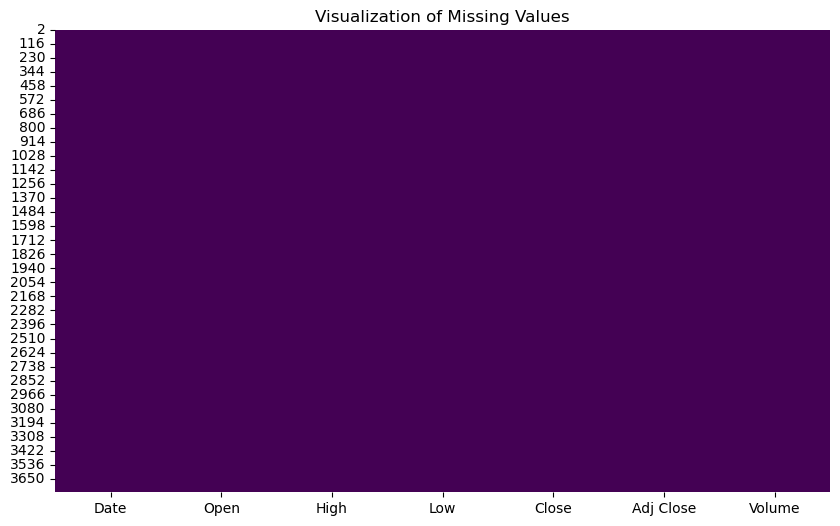

In [187]:
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualization of Missing Values")
plt.show()

## Number of duplicated rows

In [188]:
df.duplicated().sum()

0

## Gold Closing Prices Over Time

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

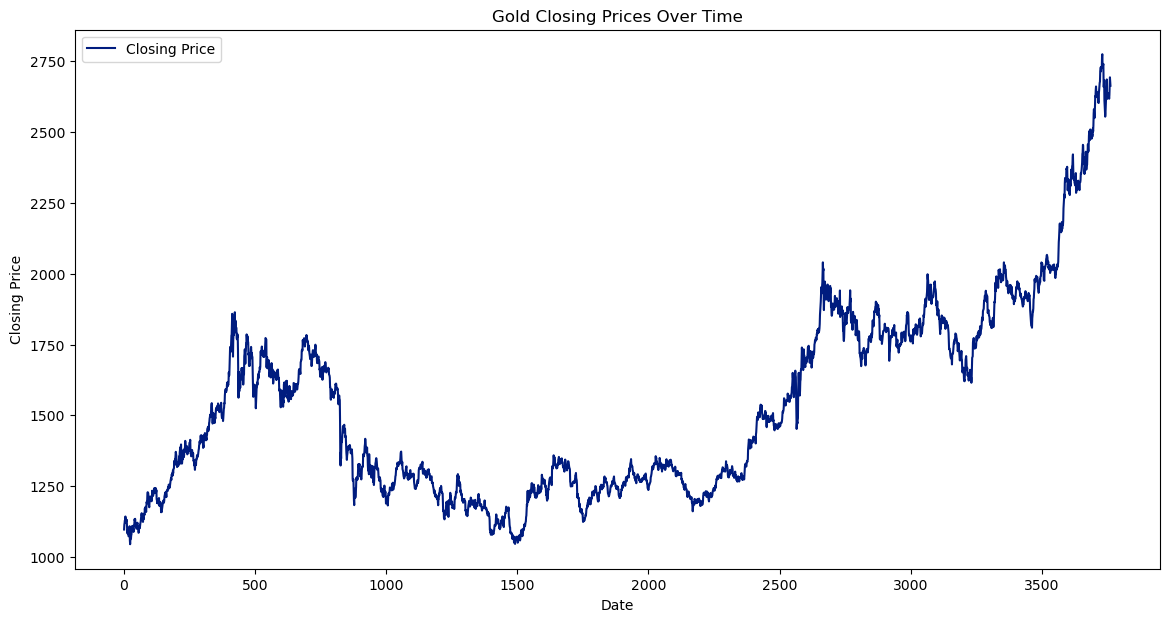

In [189]:
# Checking available styles
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Gold Opening Prices Over Time

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

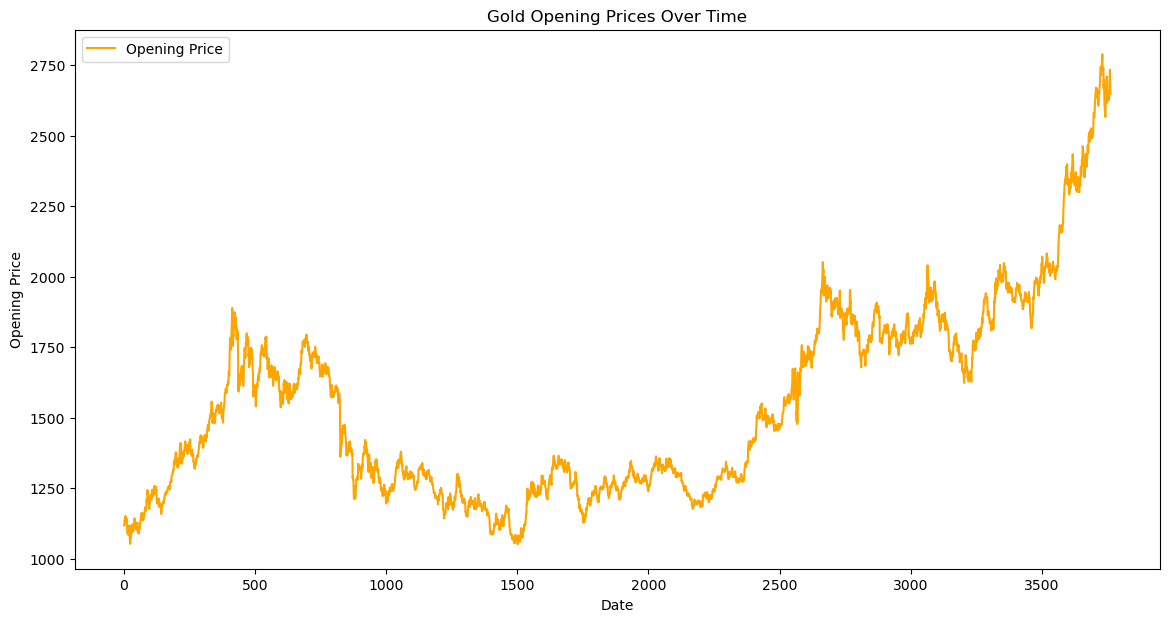

In [190]:
# Checking available styles
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label='Opening Price',color='orange')
plt.title('Gold Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

## Opening & Closing Prices of Gold


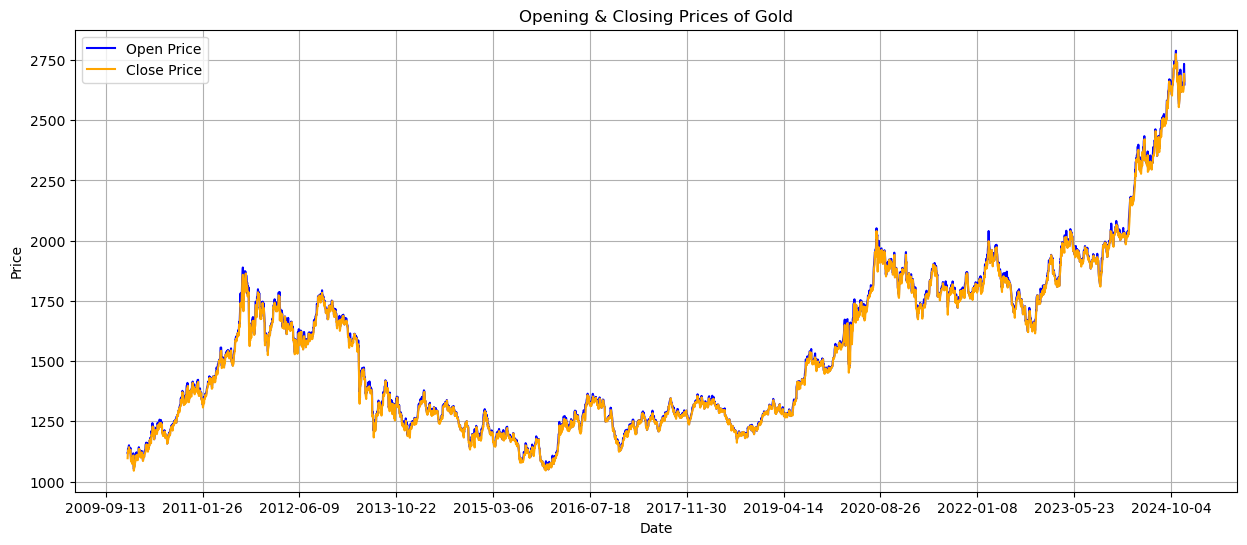

In [191]:
# Plot to visualize the dataset
plt.figure(figsize=(15, 6))

# Plot Open and Close prices
plt.plot(df['Date'], df['Open'], label='Open Price', color='b')
plt.plot(df['Date'], df['Close'], label='Close Price', color='orange')

# Customize the x-axis to show dates every year
plt.title('Opening & Closing Prices of Gold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Format the x-axis to show only year intervals
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=15))
plt.grid(True)

## Seasonal Decomposition of Closing Prices

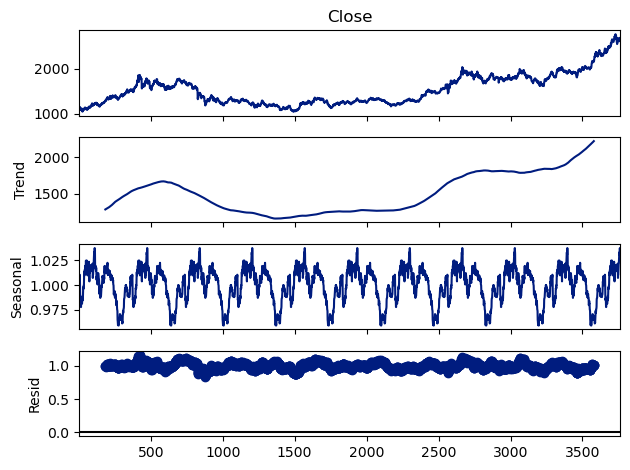

In [192]:
# Ensure the data is sorted by date in ascending order
df = df.sort_index(ascending=True)

# Perform seasonal decomposition again
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


## Visualizing the Distribution of Numerical Variables

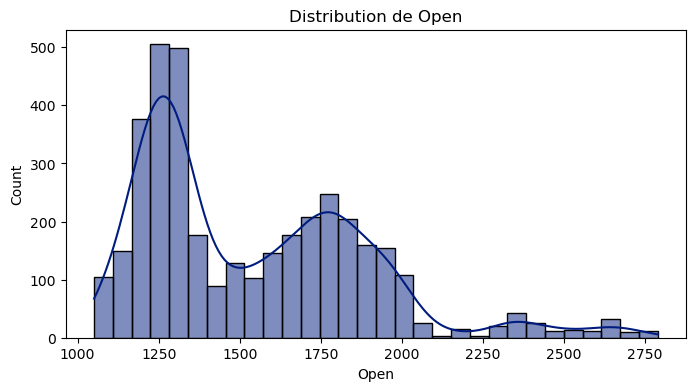

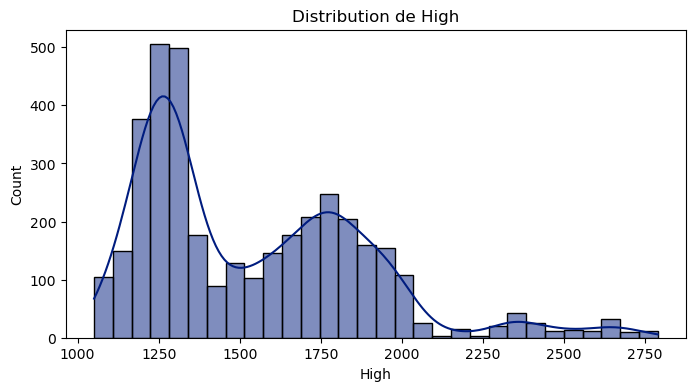

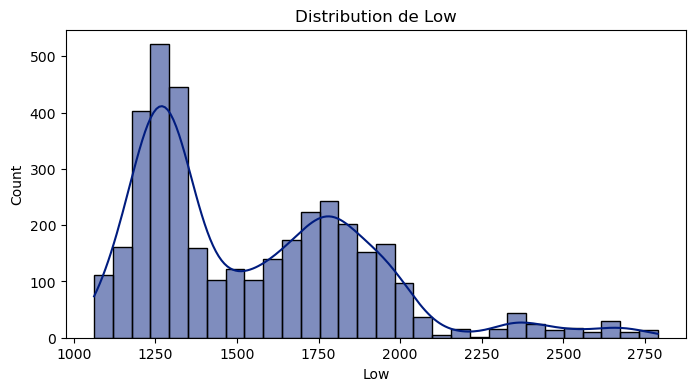

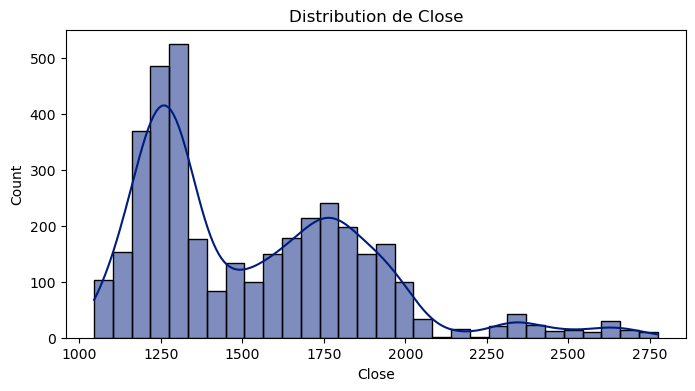

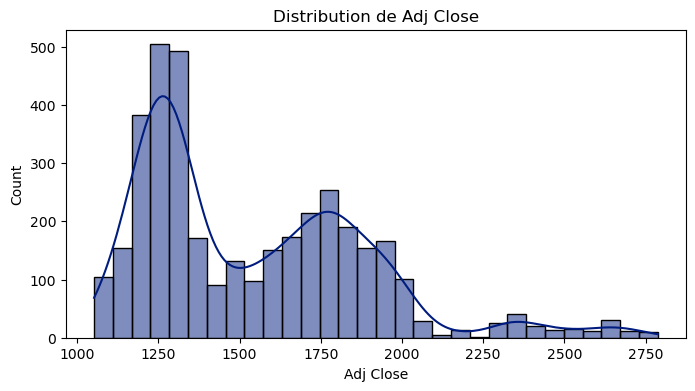

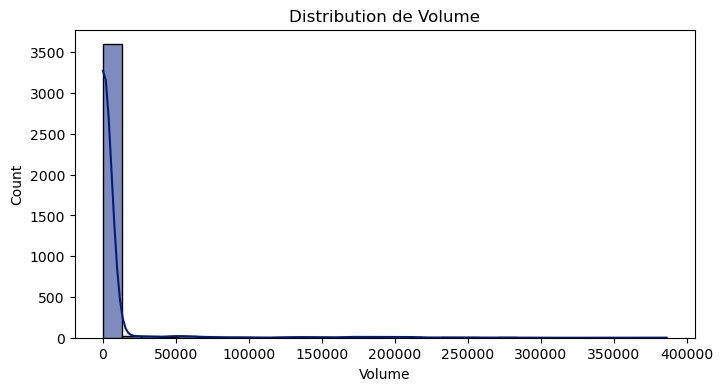

In [193]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()

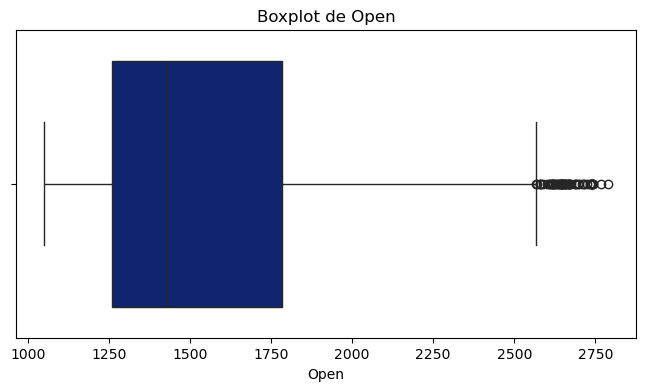

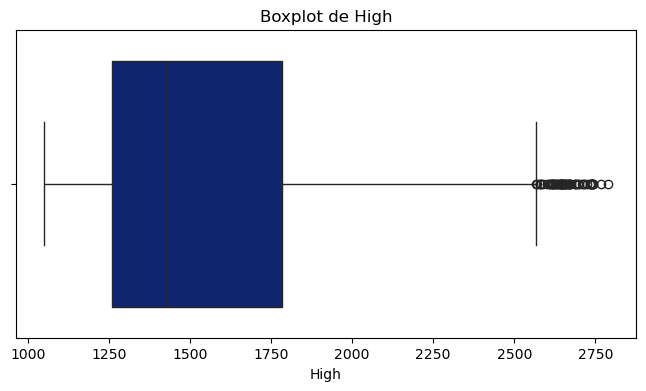

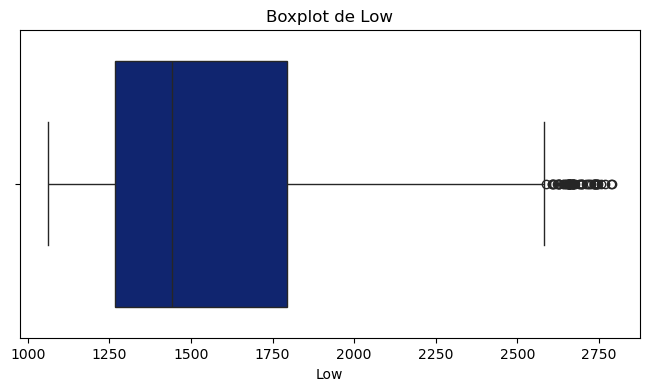

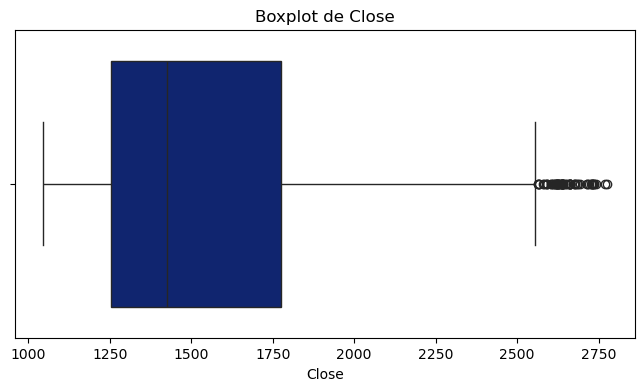

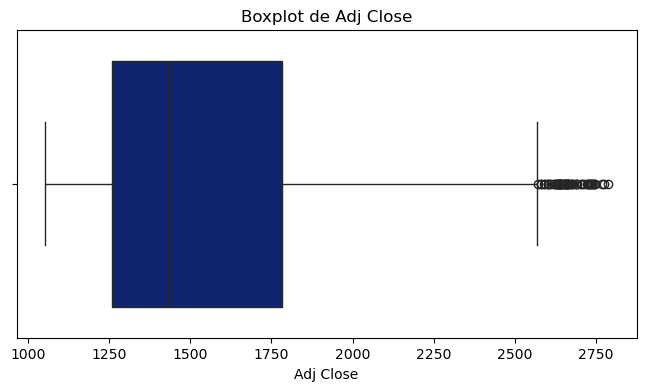

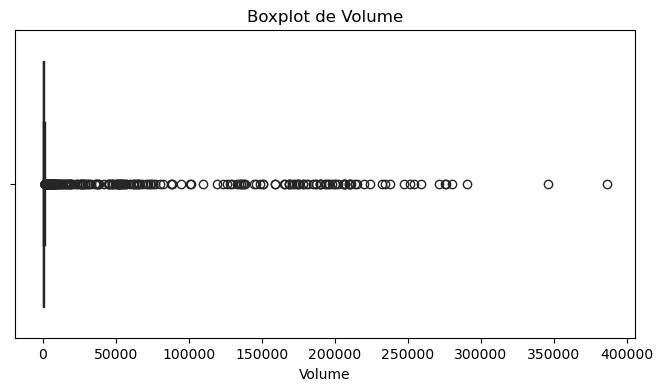

In [194]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


## Relationship Between Two Numerical Variables

Correlation of 'Open' with other variables:
Correlation between 'Open' and 'High': 0.9999999999999999


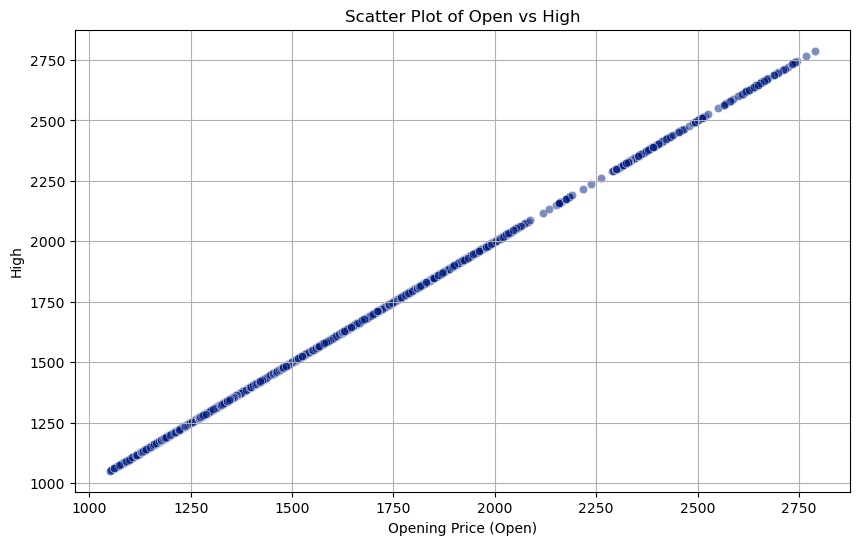

Correlation between 'Open' and 'Low': 0.9995658752766182


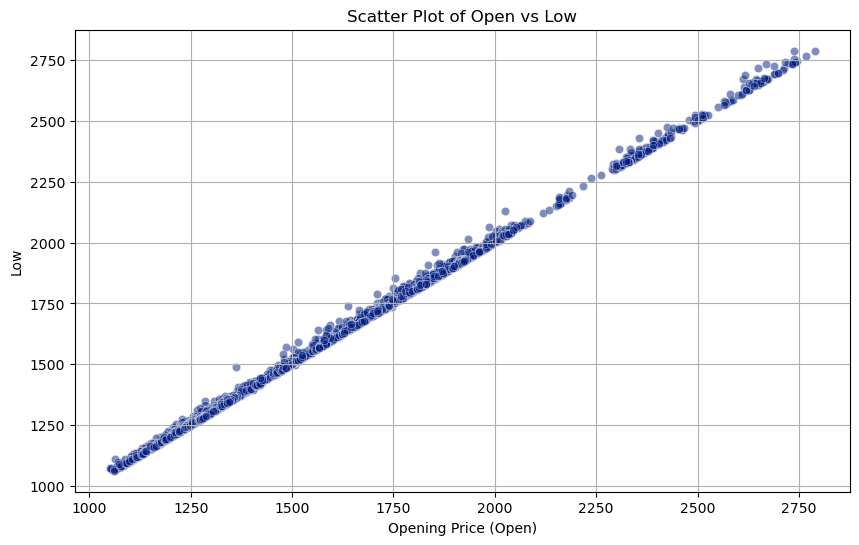

Correlation between 'Open' and 'Close': 0.9996724627743256


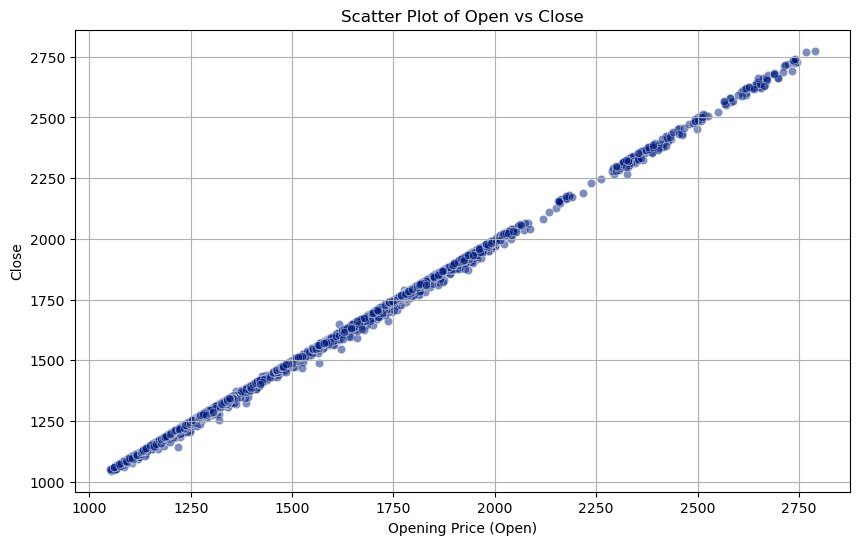

Correlation between 'Open' and 'Volume': -0.018875151665648224


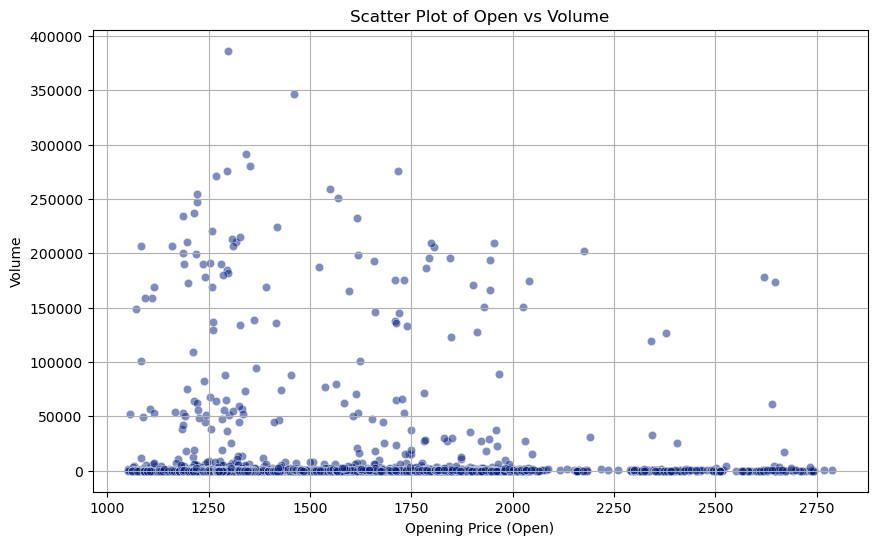

In [196]:
# List of variables to compare with 'Open'
variables = ['High', 'Low', 'Close', 'Volume']

# Calculate and print correlation between 'Open' and other variables
print("Correlation of 'Open' with other variables:")
for var in variables:
    correlation = df['Open'].corr(df[var])
    print(f"Correlation between 'Open' and '{var}': {correlation}")

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Open'], y=df[var], alpha=0.5)
    plt.title(f'Scatter Plot of Open vs {var}')
    plt.xlabel('Opening Price (Open)')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

## Correlation Matrix

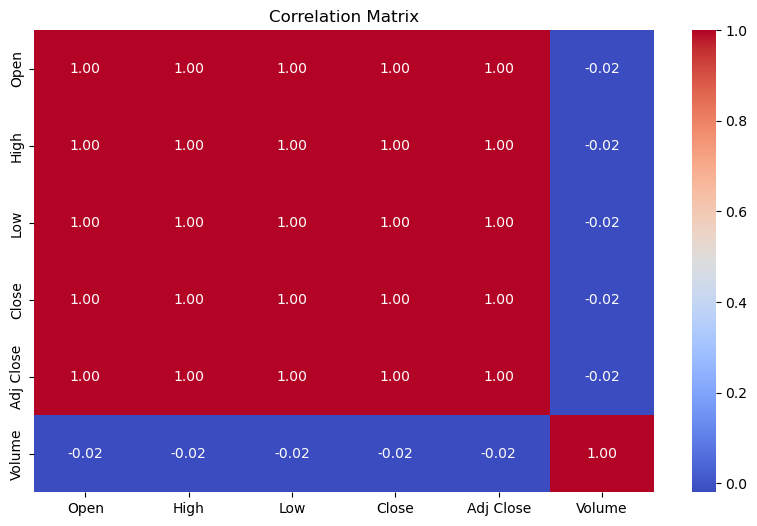

In [197]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()